# ---------------------<<<*` Flight Delay Analysis and Prediction`*>>>----------------------

### Link to [Main Data Processing and Visualization Python file](22022019_Batch%2049_PHD_ML_2383.ipynb)


>## <p style="font-family: Courier; font-size:1.2em;text-decoration: underline;">Table of Contents:</p><a class="anchor" id="toc"></a>
- [Probelm Statement](#problem-statement)
- [Supporting Libraries Import](#first-bullet)
- [Data Understanding and Cleaning](#Reading-bullet)
    - [Data Report](#data-report)
    - [Dropping Duplicate rows](#dropdup)
    - [Checking Nulls and Datatypes](#null-datatypes)
    - [Cleaning the Data](#cleaning)
- [Imputation acoording to the Domain knowledge](#imputation-bullet)
- [Correlation Plot](#corr)
- [Label Encoding and Scaling](#encoding)
- [Splitting Data into train and Validation</p>](#split)
- [Model Building](#model-building)
    - [Logistic Regression](#logit)
        - [Logistic Regression P/R Curve](#logitpr)
    - [Catboost(Boosting Technique)](#catboost)
        - [Catboost P/R Curve](#catboostprc)
    - [Xgboost(Boosting Technique)](#xgb)
        - [xgboost P/R Curve](#xgbprc)
        - [Building xgboost on important Features](#xgbimp)
    - [Random Forest(Bagging Technique)](#rfb)
        - [Random Forest P/R Curve](#rfbprc)
        - [Building Random on important Features](#rfbimp)
        - [Grid Search on Random Forest](#rfgs)
    - [Deep Learning Neural Networks](#dlnn)
- [Summary](#summary)
- [Business Recommendations](#bussrecom)

## << `Problem Statement` >><a class="anchor" id="problem-statement"></a> 

**`Problem Description:`**

Air travel is becoming increasingly complex with multiple variables impacting the same. The flight delay is one of such variables impacts carrier, Airport, and passenger and may result in significant commercial loss or reputation loss to all the stakeholders and thus huge cost on the economy. Thus, prediction of delay is crucial not only from viewpoint of a customer from the time management perspective and carrier for retention of customer faith but also from Airport point of view for managing the traffic more efficiently to optimize the number of arriving flights by appropriate adjustment of schedules. The contribution of weather conditions has been identified to be a very important contributor to these delays. 
It is of the utmost interest of one of the participants of the ecosystem to predict flight delays based on the flight's details and predicted weather conditions by a good predictive model, which you are going to build, to take the necessary corrective and preventive actions to improve business as well as service. 
The historical data containing scheduled departure and arrival times, date, origin, destination and also weather data is available and we the data scientists can predict if the delay can happen or not using the flight data and aviation weather data for a specific flight.

**`About Data:`**

Every single flight is observed as per their scheduled departure and arrival timestamps, to record the details of trips made, traffic conditions, etc. Flight details like Origin, destination, date of flight, scheduled departure and scheduled arrival timestamps etc. Weather stations data details like station id along with it’s linked AirportID, ground height etc. Hourly aviation weather conditions data also provided for 2 years etc. Origin, Destination details in-flight data can be mapped to the AirportID in other datasets.

**`Objectives:`**

1. Deriving the Categorical Target Attribute “FlightDelayStatus”:
       - Deriving the categorical Target attribute “FlightDelayStatus”  for Train data provided
2. Predicting the flight delay ‘1’ or ‘2’ for the test set :
       - Creating an analytical and modeling framework to predict the flight delay of each id categorizing into “1” or ”2”

             “1” indicates: “Yes” and 
             “2” indicates: ”No”


**`Task:`**

Build a binary classification model for predicting arrival delays > 15minutes without using Actual Arrival time as an input feature.

### <<`Supporting Libraries Import`>> <a class="anchor" id="first-bullet"></a> 

In [728]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import os 

#visualization
#import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


#ML
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import ensemble, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.metrics import cohen_kappa_score, roc_curve, auc, precision_recall_curve
#from catboost import CatBoostClassifier
import keras
from keras.layers import Dense
from keras.models import Sequential


 [Table of contents](#toc)

## <<`Reading Data`>><a class="anchor" id="Reading-bullet"></a>

### `Flights Trip Details Data`

In [826]:
os.chdir("D:/PHD-ML/Final_Data") #change working directory

#Reading the flight trip details data
flighttrip_train = pd.read_csv("Finaltrain.csv", sep=",",
                  na_values="'', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null', '?', '#'")


In [827]:
#Reading the flight trip details data
flighttrip_test = pd.read_csv("Finaltest.csv", sep=",",
                  na_values="'', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null', '?', '#'")


In [828]:
'''print "Train data shape"  
print flighttrip_train.shape
print "\n"
print "Test data shape"  
print flighttrip_test.shape'''

'print "Train data shape"  \nprint flighttrip_train.shape\nprint "\n"\nprint "Test data shape"  \nprint flighttrip_test.shape'

 [Table of contents](#toc)

### `checking for Duplicate rows and dropping it` <a class="anchor" id="dropdup"></a>

In [829]:
flighttrip_train = flighttrip_train.drop_duplicates(keep= "last")
flighttrip_train.shape

(7861, 54)

### `Saving Flight trip id column and target column`

In [830]:
#saving train target in a variable

train_target= flighttrip_train["FlightDelayStatus"].astype('category')
test_ID= flighttrip_test['FlightNumber']

 [Table of contents](#toc)

## <<`Data Report`>><a class="anchor" id="data-report"></a>

`Command For installation of Pands_profiling`

pip install pandas_profiling

In [920]:
# Data report
pp.ProfileReport(flighttrip_train, check_correlation=False)

Number of variables,32
Number of observations,7861
Total Missing (%),0.0%
Total size in memory,2.0 MiB
Average record size in memory,264.0 B
Numeric,32
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


 [Table of contents](#toc)

## <<`Cleaning the Data`>> <a id="cleaning" class="anchor"></a>

#### `Dropping all unwanted columns like dates, timestamps, ID's`

In [832]:
imp_cols=["ScheduledTravelTime","Origin","Destination","Distance","GroundHeight","StationHeight","BarometerHeight",
             "Latitude","Longitude","Origin_TimeZone","Destination_TimeZone","Diff_TimeZone","SkyConditions","Visibility",
             "DBT","DewPointTemp","RelativeHumidityPercent","WindSpeed","WindDirection","WindGustValue","StationPressure",
             "HourlyPrecip","dest_SkyConditions","dest_Visibility","dest_DBT","dest_DewPointTemp","dest_RelativeHumidityPercent",
             "dest_WindSpeed","dest_WindDirection","dest_WindGustValue","dest_StationPressure","dest_HourlyPrecip"]

flighttrip_train.drop(flighttrip_train.columns.difference(imp_cols), 1, inplace=True)

flighttrip_test.drop(flighttrip_test.columns.difference(imp_cols), 1, inplace=True)

'''print "Train data shape"  
print flighttrip_train.shape
print "\n"
print "Test data shape"  
print flighttrip_test.shape'''

'print "Train data shape"  \nprint flighttrip_train.shape\nprint "\n"\nprint "Test data shape"  \nprint flighttrip_test.shape'

 [Table of contents](#toc)

### `checking for nulls and datatypes` <a class="anchor" id="null-datatypes"></a>

In [833]:
flighttrip_train.isnull().sum()

ScheduledTravelTime               0
Origin                            0
Destination                       0
Distance                          0
GroundHeight                      0
StationHeight                     0
BarometerHeight                   0
Latitude                          0
Longitude                         0
Origin_TimeZone                   0
Destination_TimeZone              0
Diff_TimeZone                     0
SkyConditions                     6
Visibility                        2
DBT                             379
DewPointTemp                    381
RelativeHumidityPercent         381
WindSpeed                         3
WindDirection                     3
WindGustValue                     3
StationPressure                 375
HourlyPrecip                    816
dest_SkyConditions                6
dest_Visibility                   2
dest_DBT                        258
dest_DewPointTemp               261
dest_RelativeHumidityPercent    261
dest_WindSpeed              

In [834]:
flighttrip_test.isnull().sum()

ScheduledTravelTime               0
Origin                            0
Destination                       0
Distance                          0
GroundHeight                      0
StationHeight                     0
BarometerHeight                   0
Latitude                          0
Longitude                         0
Origin_TimeZone                   0
Destination_TimeZone              0
Diff_TimeZone                     0
SkyConditions                     4
Visibility                        3
DBT                             272
DewPointTemp                    273
RelativeHumidityPercent         274
WindSpeed                         2
WindDirection                     2
WindGustValue                     2
StationPressure                 261
HourlyPrecip                    650
dest_SkyConditions                2
dest_Visibility                   3
dest_DBT                        162
dest_DewPointTemp               163
dest_RelativeHumidityPercent    164
dest_WindSpeed              

In [835]:
flighttrip_train.dtypes

ScheduledTravelTime               int64
Origin                           object
Destination                      object
Distance                          int64
GroundHeight                      int64
StationHeight                     int64
BarometerHeight                   int64
Latitude                        float64
Longitude                       float64
Origin_TimeZone                   int64
Destination_TimeZone              int64
Diff_TimeZone                     int64
SkyConditions                    object
Visibility                       object
DBT                             float64
DewPointTemp                    float64
RelativeHumidityPercent         float64
WindSpeed                       float64
WindDirection                    object
WindGustValue                   float64
StationPressure                 float64
HourlyPrecip                    float64
dest_SkyConditions               object
dest_Visibility                  object
dest_DBT                        float64


In [836]:
flighttrip_test.dtypes

ScheduledTravelTime               int64
Origin                           object
Destination                      object
Distance                          int64
GroundHeight                      int64
StationHeight                     int64
BarometerHeight                   int64
Latitude                        float64
Longitude                       float64
Origin_TimeZone                   int64
Destination_TimeZone              int64
Diff_TimeZone                     int64
SkyConditions                    object
Visibility                       object
DBT                             float64
DewPointTemp                    float64
RelativeHumidityPercent         float64
WindSpeed                       float64
WindDirection                    object
WindGustValue                   float64
StationPressure                 float64
HourlyPrecip                    float64
dest_SkyConditions               object
dest_Visibility                  object
dest_DBT                        float64


In [837]:
flighttrip_train.head().T

,0,1,2,3,4
ScheduledTravelTime,114,114,62,93,76
Origin,BOS,CLE,SNA,CLT,MSP
Destination,CLE,ATL,LAS,TPA,ORD
Distance,563,554,226,508,334
GroundHeight,19,802,49,721,871
StationHeight,30,805,55,769,838
BarometerHeight,180,805,52,724,874
Latitude,42.22,41.24,33.41,35.13,44.53
Longitude,-71.01,-81.51,-117.52,-80.56,-93.14
Origin_TimeZone,5,5,8,5,6


 [Table of contents](#toc)

## <<`Imputation according to the Domain and pattern of the columns>>`<a class="anchor" id="imputation-bullet"></a>

In [838]:
Hourlypreci_cols=['HourlyPrecip','dest_HourlyPrecip']
flighttrip_train[Hourlypreci_cols]=flighttrip_train[Hourlypreci_cols].fillna(0.0)
flighttrip_test[Hourlypreci_cols]=flighttrip_test[Hourlypreci_cols].fillna(0.0)

skycondition_cols=['SkyConditions','dest_SkyConditions']
flighttrip_train[skycondition_cols] =flighttrip_train[skycondition_cols].fillna("CLR")
flighttrip_test[skycondition_cols] =flighttrip_test[skycondition_cols].fillna("CLR")

#stationpressure_cols=["StationPressure","dest_StationPressure"]
#flighttrip_train[stationpressure_cols] = flighttrip_train[stationpressure_cols].apply(lambda x: x.fillna(flighttrip_train[x].mode()[0]))
#flighttrip_test[stationpressure_cols] = flighttrip_test[stationpressure_cols].apply(lambda x: x.fillna(flighttrip_test[x].mode()[0]))

flighttrip_train["StationPressure"] = flighttrip_train["StationPressure"].fillna(flighttrip_train["StationPressure"].mode()[0])
flighttrip_test["StationPressure"] = flighttrip_test["StationPressure"].fillna(flighttrip_test["StationPressure"].mode()[0])
flighttrip_train["dest_StationPressure"] = flighttrip_train["dest_StationPressure"].fillna(flighttrip_train["dest_StationPressure"].mode()[0])
flighttrip_test["dest_StationPressure"] = flighttrip_test["dest_StationPressure"].fillna(flighttrip_test["dest_StationPressure"].mode()[0])

WindGustValue_cols=['WindGustValue','dest_WindGustValue']
flighttrip_train[WindGustValue_cols] =flighttrip_train[WindGustValue_cols].fillna(0.0)
flighttrip_test[WindGustValue_cols] =flighttrip_test[WindGustValue_cols].fillna(0.0)



In [839]:
flighttrip_train["dest_WindDirection"].value_counts() 

VRB    697
000    596
200    291
180    277
190    264
170    256
220    236
210    229
100    222
230    221
140    214
160    210
240    197
050    183
070    172
080    170
060    169
130    169
320    168
010    168
260    166
280    165
150    165
120    165
030    160
110    159
250    158
300    158
360    156
340    153
310    153
020    153
090    151
290    150
040    149
330    145
270    122
350    121
Name: dest_WindDirection, dtype: int64

In [840]:
flighttrip_test["dest_WindDirection"].value_counts()

VRB    560
000    503
200    207
290    202
230    200
310    200
210    199
220    197
190    187
330    180
180    178
080    178
240    177
280    168
090    164
170    164
320    163
070    160
300    158
160    155
060    153
270    146
140    143
260    141
050    136
250    135
350    134
150    134
010    124
120    123
360    120
110    120
100    116
130    114
030    113
340    107
040    107
020     99
Name: dest_WindDirection, dtype: int64

In [841]:
WindDirection_cols=['WindDirection','dest_WindDirection']

flighttrip_train[WindDirection_cols] = flighttrip_train[WindDirection_cols].fillna('000')
flighttrip_test[WindDirection_cols] = flighttrip_test[WindDirection_cols].fillna('000')


In Wind Direction more than 500 row values are VRB

VRB = variable weather condition, wind will be changing for every 2 minutes for which avg cannot be taken
https://aspmhelp.faa.gov/index.php/ASPM_Weather_Factors:_Definitions_of_Variables

with this evidence imputing VRB as 050

https://aviation.stackexchange.com/questions/38528/what-are-the-criteria-for-variable-in-metar-reports/38534


In [842]:
flighttrip_train[WindDirection_cols] = np.where(flighttrip_train[WindDirection_cols]=='VRB', '030', flighttrip_train[WindDirection_cols])
flighttrip_test[WindDirection_cols] = np.where(flighttrip_test[WindDirection_cols]=='VRB', '030', flighttrip_test[WindDirection_cols])

#Changing Datatype of winddirection object to int
flighttrip_train[WindDirection_cols] = flighttrip_train[WindDirection_cols].astype(int)
flighttrip_test[WindDirection_cols] = flighttrip_test[WindDirection_cols].astype(int)

windspeed_cols=["WindSpeed", "dest_WindSpeed"]
flighttrip_train[windspeed_cols] = flighttrip_train[windspeed_cols].fillna(0.0)
flighttrip_test[windspeed_cols] = flighttrip_test[windspeed_cols].fillna(0.0)

mean_impute_cols=['RelativeHumidityPercent','DewPointTemp','dest_RelativeHumidityPercent','dest_DewPointTemp',"DBT", "dest_DBT"]
flighttrip_train[mean_impute_cols] = flighttrip_train[mean_impute_cols].fillna(flighttrip_train[mean_impute_cols].mean())
flighttrip_test[mean_impute_cols] = flighttrip_test[mean_impute_cols].fillna(flighttrip_train[mean_impute_cols].mean())


#visibility_cols=['Visibility','dest_Visibility']
#flighttrip_train[visibility_cols] = flighttrip_train[visibility_cols].apply(lambda x: x.fillna(flighttrip_train[x].mode()[0]))
#flighttrip_test[visibility_cols] = flighttrip_test[visibility_cols].apply(lambda x: x.fillna(flighttrip_test[x].mode()[0]))

flighttrip_train['Visibility'] = flighttrip_train['Visibility'].fillna(flighttrip_train['Visibility'].mode()[0])
flighttrip_test['Visibility'] = flighttrip_test['Visibility'].fillna(flighttrip_train['Visibility'].mode()[0])
flighttrip_train['dest_Visibility'] = flighttrip_train['dest_Visibility'].fillna(flighttrip_train['dest_Visibility'].mode()[0])
flighttrip_test['dest_Visibility'] = flighttrip_test['dest_Visibility'].fillna(flighttrip_train['dest_Visibility'].mode()[0])



In [843]:
(flighttrip_train.isnull().sum()).sum()


0

In [844]:
(flighttrip_test.isnull().sum()).sum()


0

**Visibility Columns information**:

In meteorology, visibility is a measure of the distance at which an object or light can be clearly discerned. It is reported within surface weather observations and METAR code either in meters or statute miles, depending upon the country.

In [845]:
#Removing SM from its visibility column values

In [846]:
visibility_cols=['Visibility','dest_Visibility']
flighttrip_train[visibility_cols] = flighttrip_train[visibility_cols].apply(lambda x: x.str.replace('SM',''))
flighttrip_test[visibility_cols] = flighttrip_test[visibility_cols].apply(lambda x: x.str.replace('SM',''))


In [847]:
flighttrip_train['Visibility'].value_counts()

10        5367
7          348
8          335
9          333
6          318
5          224
3          191
4          179
2          157
2.5        103
0.5         59
1           47
1.5         42
0.25        34
1.25        31
0.75        29
0.0625      26
1.75        22
0.125       12
0            4
Name: Visibility, dtype: int64

In [848]:
flighttrip_train[visibility_cols] = flighttrip_train[visibility_cols].astype(float)
flighttrip_test[visibility_cols] = flighttrip_test[visibility_cols].astype(float)


In [849]:
flighttrip_train.dtypes

ScheduledTravelTime               int64
Origin                           object
Destination                      object
Distance                          int64
GroundHeight                      int64
StationHeight                     int64
BarometerHeight                   int64
Latitude                        float64
Longitude                       float64
Origin_TimeZone                   int64
Destination_TimeZone              int64
Diff_TimeZone                     int64
SkyConditions                    object
Visibility                      float64
DBT                             float64
DewPointTemp                    float64
RelativeHumidityPercent         float64
WindSpeed                       float64
WindDirection                     int32
WindGustValue                   float64
StationPressure                 float64
HourlyPrecip                    float64
dest_SkyConditions               object
dest_Visibility                 float64
dest_DBT                        float64


In [850]:
flighttrip_test.dtypes

ScheduledTravelTime               int64
Origin                           object
Destination                      object
Distance                          int64
GroundHeight                      int64
StationHeight                     int64
BarometerHeight                   int64
Latitude                        float64
Longitude                       float64
Origin_TimeZone                   int64
Destination_TimeZone              int64
Diff_TimeZone                     int64
SkyConditions                    object
Visibility                      float64
DBT                             float64
DewPointTemp                    float64
RelativeHumidityPercent         float64
WindSpeed                       float64
WindDirection                     int32
WindGustValue                   float64
StationPressure                 float64
HourlyPrecip                    float64
dest_SkyConditions               object
dest_Visibility                 float64
dest_DBT                        float64


In [851]:
flighttrip_train.head(10).T

,0,1,2,3,4,5,6,7,8,9
ScheduledTravelTime,114,114,62,93,76,62,107,63,120,156
Origin,BOS,CLE,SNA,CLT,MSP,CVG,DFW,ACV,BHM,DFW
Destination,CLE,ATL,LAS,TPA,ORD,GRR,STL,SFO,DFW,PIT
Distance,563,554,226,508,334,268,551,250,597,1068
GroundHeight,19,802,49,721,871,882,559,222,636,559
StationHeight,30,805,55,769,838,883,596,210,630,596
BarometerHeight,180,805,52,724,874,885,562,225,639,562
Latitude,42.22,41.24,33.41,35.13,44.53,39.02,32.54,40.59,33.34,32.54
Longitude,-71.01,-81.51,-117.52,-80.56,-93.14,-84.4,-97.02,-124.07,-86.45,-97.02
Origin_TimeZone,5,5,8,5,6,5,6,8,6,6


In [852]:
flighttrip_test.head(10).T

,0,1,2,3,4,5,6,7,8,9
ScheduledTravelTime,100,75,64,102,63,77,65,79,70,179
Origin,DEN,RIC,IAD,SAV,SBP,LGA,STL,ORD,ONT,LGA
Destination,XNA,EWR,GSO,CVG,LAX,PWM,LIT,STL,PHX,MIA
Distance,616,278,239,515,155,270,296,258,325,1097
GroundHeight,5379,164,306,48,193,36,707,655,901,36
StationHeight,5431,163,323,51,207,31,710,674,905,31
BarometerHeight,5382,167,309,51,196,39,710,658,904,39
Latitude,39.5,37.31,38.56,32.07,35.14,40.47,38.45,41.59,34.04,40.47
Longitude,-104.4,-77.19,-77.27,-81.12,-120.38,-73.53,-90.22,-87.55,-117.36,-73.53
Origin_TimeZone,7,5,5,5,8,5,6,6,8,5


 [Table of contents](#toc)

## <<`Correlation Plot`>> <a id="#corr1" class="anchor" ></a>

In [853]:
'''#checking correlation head map
names=["ScheduledTravelTime","Distance","GroundHeight","StationHeight","BarometerHeight",
             "Latitude","Longitude","Origin_TimeZone","Destination_TimeZone","Diff_TimeZone","Visibility",
             "DBT","DewPointTemp","RelativeHumidityPercent","WindSpeed","WindDirection","WindGustValue","StationPressure",
             "HourlyPrecip","dest_Visibility","dest_DBT","dest_DewPointTemp","dest_RelativeHumidityPercent",
             "dest_WindSpeed","dest_WindDirection","dest_WindGustValue","dest_StationPressure","dest_HourlyPrecip"]

correlations = flighttrip_train[names].corr()
# plot correlation matrix
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(correlations),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
ax.set_title("Correlation Plot",fontdict= {'fontsize': 20, 'fontweight' : 'light',
        'verticalalignment': 'baseline'}
)
plt.show()'''

'#checking correlation head map\nnames=["ScheduledTravelTime","Distance","GroundHeight","StationHeight","BarometerHeight",\n             "Latitude","Longitude","Origin_TimeZone","Destination_TimeZone","Diff_TimeZone","Visibility",\n             "DBT","DewPointTemp","RelativeHumidityPercent","WindSpeed","WindDirection","WindGustValue","StationPressure",\n             "HourlyPrecip","dest_Visibility","dest_DBT","dest_DewPointTemp","dest_RelativeHumidityPercent",\n             "dest_WindSpeed","dest_WindDirection","dest_WindGustValue","dest_StationPressure","dest_HourlyPrecip"]\n\ncorrelations = flighttrip_train[names].corr()\n# plot correlation matrix\nfig = plt.figure(figsize=(20,20))\nax = fig.add_subplot(111)\ncax = ax.matshow(correlations, vmin=-1, vmax=1)\nfig.colorbar(cax)\nticks = np.arange(0,len(correlations),1)\nax.set_xticks(ticks)\nax.set_yticks(ticks)\nax.set_xticklabels(names)\nax.set_yticklabels(names)\nax.set_title("Correlation Plot",fontdict= {\'fontsize\': 20, \'fontweig

 [Table of contents](#toc)

## <<`Label encoding and Scaling`>><a class="anchor" id="#encoding"></a>

In [854]:
# Import libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Define which columns should be encoded vs scaled
columns_to_scale=["ScheduledTravelTime","Distance","GroundHeight","StationHeight","BarometerHeight",
             "Latitude","Longitude","Origin_TimeZone","Destination_TimeZone","Diff_TimeZone","Visibility",
             "DBT","DewPointTemp","RelativeHumidityPercent","WindSpeed","WindDirection","WindGustValue","StationPressure",
             "HourlyPrecip","dest_Visibility","dest_DBT","dest_DewPointTemp","dest_RelativeHumidityPercent",
             "dest_WindSpeed","dest_WindDirection","dest_WindGustValue","dest_StationPressure","dest_HourlyPrecip"]
columns_to_encode = ["Origin","Destination","SkyConditions","dest_SkyConditions"]

# Instantiate encoder/scaler
scaler = StandardScaler()
label_encode    = LabelEncoder()

# Scale and Encode Separate Columns
scaler.fit(flighttrip_train[columns_to_scale])
flighttrip_train[columns_to_scale] = scaler.transform(flighttrip_train[columns_to_scale])
scaler.fit(flighttrip_test[columns_to_scale])
flighttrip_test[columns_to_scale] = scaler.transform(flighttrip_test[columns_to_scale])


flighttrip_train[columns_to_encode] = flighttrip_train[columns_to_encode].apply(lambda x: label_encode.fit_transform(x))
flighttrip_test[columns_to_encode] = flighttrip_test[columns_to_encode].apply(lambda x: label_encode.fit_transform(x))


 [Table of contents](#toc)

## <<`Train and test split`>> <a class="anchor" id="split"></a>

In [855]:
X_train, X_val, y_train, y_val = train_test_split(flighttrip_train, train_target, test_size = 0.25, random_state = 12342, stratify=train_target)

 [Table of contents](#toc)

## <<`Model Building`>> <a class="anchor" id="model-building"></a>

<<`Target Data Mapping to binary values`>>

In [856]:
y_target =y_train.map({1:'0',2:'1'})

y_target = y_target.astype(np.int64)

y_target.dtypes

dtype('int64')

In [857]:
y_val_target =y_val.map({1:'0',2:'1'})

y_val_target = y_val_target.astype(np.int64)

y_val_target.dtypes

dtype('int64')

In [858]:
y_val_target.value_counts()

1    1586
0     380
Name: FlightDelayStatus, dtype: int64

In [859]:
y_val_target

3021    0
1889    1
6541    1
7190    1
2091    1
4738    1
5136    1
4491    0
774     0
3548    1
3272    0
2494    1
11      1
2183    1
1836    1
2524    1
1992    1
6973    1
6591    1
5714    1
6287    1
6268    1
5191    0
5051    0
651     1
5820    1
7657    1
4556    0
2451    0
7031    1
       ..
3993    0
7236    0
3825    1
1040    1
6564    1
5559    1
6634    1
838     1
278     1
1716    1
5955    1
334     1
5312    1
1923    1
5507    1
2193    1
5435    1
1869    0
2049    1
1973    1
5247    1
7101    1
1330    1
1348    1
5852    0
1383    1
4596    0
4612    1
7615    1
6104    1
Name: FlightDelayStatus, Length: 1966, dtype: int64

 [Table of contents](#toc)

## <<`Logistic Regression`>><a class="anchor" id="logit"></a>

In [860]:
lr = LogisticRegression(class_weight={1:0.248,0:0.742})
lr.fit(X_train, y_target)

LogisticRegression(C=1.0, class_weight={1: 0.248, 0: 0.742}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [861]:
predicted_lr = lr.predict(X_train)
preds_val_lr=lr.predict(X_val)
print ('Train F1 Score:', f1_score(y_target, predicted_lr, pos_label=0))
print ('Val F1 Score:', f1_score(y_val_target, preds_val_lr, pos_label=0))

print ('Train Accuarcy:',  accuracy_score(y_target, predicted_lr))
print ('Val Accuracy:',  accuracy_score(y_val_target, preds_val_lr))

print ('Train Classification Report:\n',  classification_report(y_target, predicted_lr))
print ('Validation Classification Report:\n',  classification_report(y_val_target, preds_val_lr))

print ('Train Kappa score:',  cohen_kappa_score(y_target, predicted_lr))
print ('Validation Kappa score:',  cohen_kappa_score(y_val_target, preds_val_lr))

Train F1 Score: 0.5186897880539499
Val F1 Score: 0.5029103608847497
Train Accuarcy: 0.788125530110263
Val Accuracy: 0.7828077314343845
Train Classification Report:
              precision    recall  f1-score   support

          0       0.46      0.59      0.52      1139
          1       0.90      0.84      0.86      4756

avg / total       0.81      0.79      0.80      5895

Validation Classification Report:
              precision    recall  f1-score   support

          0       0.45      0.57      0.50       380
          1       0.89      0.83      0.86      1586

avg / total       0.80      0.78      0.79      1966

Train Kappa score: 0.3854432570496171
Validation Kappa score: 0.3663110283116715


 [Table of contents](#toc)

### `Logistic Regression P/R Curve Validation`<a class="anchor" id="logitpr"></a>

In [862]:
#auc on train data
p, r, threshold = precision_recall_curve(y_target,predicted_lr)
roc_auc = auc(r, p)
print(roc_auc)

#auc on val data
p_val, r_val, threshold = precision_recall_curve(y_val_target,preds_val_lr)
roc_auc_val = auc(r_val, p_val)
print(roc_auc_val)

0.9316058411779713
0.9288295052999304


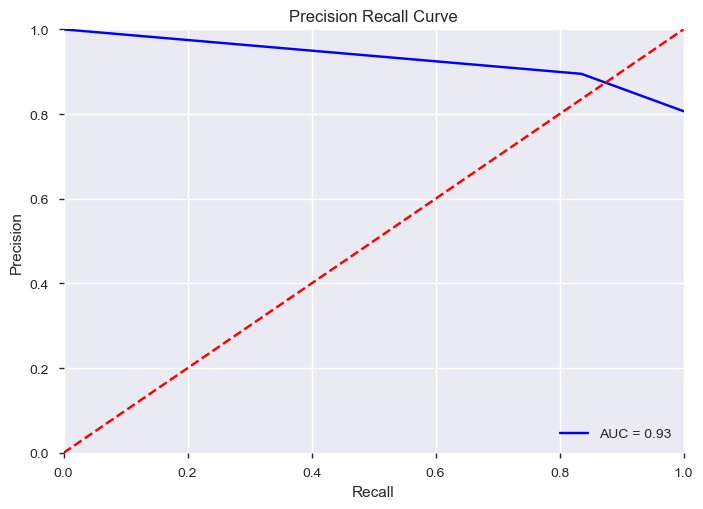

In [863]:
# Roc Plot
import matplotlib.pyplot as plt
plt.title('Precision Recall Curve')
plt.plot(r, p, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'best')
plt.plot([0, 1], [0, 1],'r--')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

 [Table of contents](#toc)

## <<`Catboost (Boosting Technique)`>><a class="anchor" id="catboost"></a>

**`Advantages of CatBoost Library`**
- Performance: CatBoost provides state of the art results and it is competitive with any leading machine learning algorithm on the performance front.
- Robust: It reduces the need for extensive hyper-parameter tuning and lower the chances of overfitting also which leads to more generalized models. Although, CatBoost has multiple parameters to tune and it contains parameters like the number of trees, learning rate, regularization, tree depth, fold size, bagging temperature and others. 
- Easy-to-use: We can use CatBoost from the command line, using an user-friendly API for both Python and R.

`For installing Catboost classifer`

pip install catboost

In [864]:
from catboost import CatBoostClassifier

#using gradient boosting method called Catboost which will accept catagorical variables
model = CatBoostClassifier(iterations=85, learning_rate=0.04, depth=8, loss_function='Logloss',
                           boosting_type='Ordered', bagging_temperature= 0.05,thread_count=15,class_weights=(0.68,0.32), 
                            colsample_bylevel=0.8,random_seed=132456, approx_on_full_history=True, metric_period=10 )
# Fit model
model.fit(X_train, y_target)


preds_class_train = model.predict(X_train)
# Get predicted probabilities for each class
preds_proba_train = model.predict_proba(X_train)
# Get predicted RawFormulaVal
preds_raw_train = model.predict(X_train, prediction_type='Class') 


preds_class = model.predict(X_val)
# Get predicted probabilities for each class
preds_proba = model.predict_proba(X_val)
# Get predicted RawFormulaVal
preds_raw = model.predict(X_val, prediction_type='Class') 

0:	learn: 0.6766684	total: 342ms	remaining: 28.7s
10:	learn: 0.5771574	total: 4.06s	remaining: 27.3s
20:	learn: 0.5306308	total: 7.26s	remaining: 22.1s
30:	learn: 0.5058017	total: 10s	remaining: 17.5s
40:	learn: 0.4902576	total: 13.2s	remaining: 14.2s
50:	learn: 0.4813479	total: 16s	remaining: 10.7s
60:	learn: 0.4712293	total: 19.5s	remaining: 7.67s
70:	learn: 0.4609301	total: 22.1s	remaining: 4.36s
80:	learn: 0.4542251	total: 24.6s	remaining: 1.22s
84:	learn: 0.4519590	total: 25.6s	remaining: 0us


In [865]:
print ('Train F1 Score:', f1_score(y_target, preds_raw_train, pos_label=0))
print ('Val F1 Score:', f1_score(y_val_target, preds_raw, pos_label=0))

print ('Train Accuarcy:',  accuracy_score(y_target, preds_raw_train))
print ('Val Accuracy:',  accuracy_score(y_val_target, preds_raw))

print ('Train Classification Report:\n',  classification_report(y_target, preds_raw_train))
print ('Validation Classification Report:\n',  classification_report(y_val_target, preds_raw))

print ('Train Kappa score:',  cohen_kappa_score(y_target, preds_raw_train))
print ('Validation Kappa score:',  cohen_kappa_score(y_val_target, preds_raw))

Train F1 Score: 0.5736773065150853
Val F1 Score: 0.5490196078431372
Train Accuarcy: 0.8346055979643766
Val Accuracy: 0.8245167853509664
Train Classification Report:
              precision    recall  f1-score   support

          0       0.57      0.58      0.57      1139
          1       0.90      0.90      0.90      4756

avg / total       0.84      0.83      0.83      5895

Validation Classification Report:
              precision    recall  f1-score   support

          0       0.55      0.55      0.55       380
          1       0.89      0.89      0.89      1586

avg / total       0.83      0.82      0.82      1966

Train Kappa score: 0.4710800985872371
Validation Kappa score: 0.4400894839812116


In [866]:
preds_raw_test=model.predict(flighttrip_test)

In [867]:
#Writing to csv

submission_df_cat= pd.DataFrame()

submission_df_cat["FlightNumber"]=test_ID
submission_df_cat["FlightDelayStatus"]= preds_raw_test

submission_df_cat["FlightDelayStatus"] =submission_df_cat["FlightDelayStatus"].map({0:1,1:2})

submission_df_cat["FlightDelayStatus"] = submission_df_cat["FlightDelayStatus"].astype('category')

#submission_df["FlightDelayStatus"].dtypes

submission_df_cat.to_csv('D:/PHD-ML/submission_xgb_fi.csv',sep=',',index=False)

 [Table of contents](#toc)

### `Castboost model P/R Curve Validation`<a class="anchor" id="catboostprc"></a>

In [868]:
#auc on train data
p, r, threshold = precision_recall_curve(y_target,preds_raw_train)
roc_auc = auc(r, p)
print(roc_auc)

#auc on val data
p_val, r_val, threshold = precision_recall_curve(y_val_target,preds_raw)
roc_auc_val = auc(r_val, p_val)
print(roc_auc_val)



0.9391319056073781
0.9355729319543026


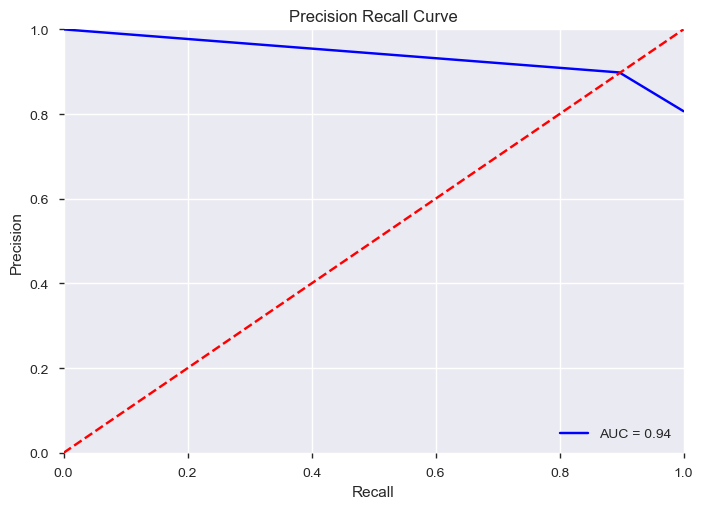

In [869]:
#from ggplot import *
#df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
#ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

# Roc Plot
import matplotlib.pyplot as plt
plt.title('Precision Recall Curve')
plt.plot(r, p, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'best')
plt.plot([0, 1], [0, 1],'r--')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

 [Table of contents](#toc)

## <<`xgboost Modeling Technique`>><a class="anchor" id="xgb"></a>

In [870]:
model_xgb = XGBClassifier(base_score=0.8, booster='gbtree', colsample_bylevel=0.75,
                          colsample_bytree=0.8, gamma=4, learning_rate=0.015, max_delta_step=10,
                          max_depth=8, min_child_weight=0.8, missing=None, n_estimators=80,
                          n_jobs=60, nthread=70, objective='binary:logistic', random_state=13456,
                          scale_pos_weight=0.3, seed=132456,silent=True, subsample=0.85)
model_xgb.fit(X_train, y_target)

XGBClassifier(base_score=0.8, booster='gbtree', colsample_bylevel=0.75,
       colsample_bytree=0.8, gamma=4, learning_rate=0.015,
       max_delta_step=10, max_depth=8, min_child_weight=0.8, missing=None,
       n_estimators=80, n_jobs=60, nthread=70, objective='binary:logistic',
       random_state=13456, reg_alpha=0, reg_lambda=1, scale_pos_weight=0.3,
       seed=132456, silent=True, subsample=0.85)

In [871]:
predicted_xgb = model_xgb.predict(X_train)
preds_val_xgb=model_xgb.predict(X_val)
print ('Train F1 Score:', f1_score(y_target, predicted_xgb, pos_label=0))
print ('Val F1 Score:', f1_score(y_val_target, preds_val_xgb, pos_label=0))
print ('Train Accuracy:', accuracy_score(y_target, predicted_xgb))
print ('Val Accuracy:', accuracy_score(y_val_target, preds_val_xgb))
print ('Train Classification Report:\n',  classification_report(y_target, predicted_xgb))
print ('Validation Classification Report:\n',  classification_report(y_val_target, preds_val_xgb))
print ('Train Kappa score:',  cohen_kappa_score(y_target, predicted_xgb))
print ('Validation Kappa score:',  cohen_kappa_score(y_val_target, preds_val_xgb))

Train F1 Score: 0.5947625388371061
Val F1 Score: 0.5240641711229946
Train Accuracy: 0.8451229855810009
Val Accuracy: 0.8189216683621566
Train Classification Report:
              precision    recall  f1-score   support

          0       0.60      0.59      0.59      1139
          1       0.90      0.91      0.90      4756

avg / total       0.84      0.85      0.84      5895

Validation Classification Report:
              precision    recall  f1-score   support

          0       0.53      0.52      0.52       380
          1       0.88      0.89      0.89      1586

avg / total       0.82      0.82      0.82      1966

Train Kappa score: 0.4990446997847956
Validation Kappa score: 0.41229066041474927


In [872]:
# Get predicted RawFormula for test
preds_raw_test = model_xgb.predict(flighttrip_test)
preds_raw_test

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [873]:
#Writing to csv

submission_df= pd.DataFrame()

submission_df["FlightNumber"]=test_ID
submission_df["FlightDelayStatus"]= preds_raw_test

submission_df["FlightDelayStatus"] =submission_df["FlightDelayStatus"].map({0:1,1:2})

submission_df["FlightDelayStatus"] = submission_df["FlightDelayStatus"].astype('category')

#submission_df["FlightDelayStatus"].dtypes

submission_df.to_csv('D:/PHD-ML/submission_xgb.csv',sep=',',index=False)

 [Table of contents](#toc)

### `Xgboost model P/R Curve Validation`<a class="anchor" id="xgbprc"></a>

In [916]:
#auc on train data
p, r, threshold = precision_recall_curve(y_target, predicted_xgb)
roc_auc = auc(r, p)
print(roc_auc)

#auc on val data
p_val, r_val, threshold = precision_recall_curve(y_val_target,preds_val_xgb)
roc_auc_val = auc(r_val, p_val)
print(roc_auc_val)



0.941932836255141
0.931947212895788


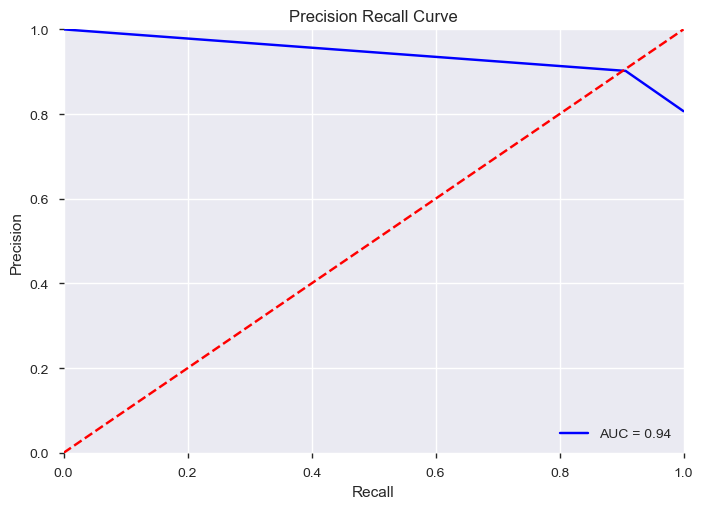

In [919]:
#from ggplot import *
#df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
#ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

# Roc Plot
import matplotlib.pyplot as plt
plt.title('Precision Recall Curve')
plt.plot(r, p, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'best')
plt.plot([0, 1], [0, 1],'r--')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

 [Table of contents](#toc)

### `Extract Xgboost important features and Building Model`<a class="anchor" id="xgbimp"></a>

In [876]:
model_xgb.feature_importances_

array([0.04666667, 0.0454902 , 0.04980392, 0.03764706, 0.01882353,
       0.01490196, 0.01568628, 0.03921569, 0.05294118, 0.01019608,
       0.02941176, 0.00980392, 0.04941177, 0.02196078, 0.03254902,
       0.0317647 , 0.04078431, 0.03921569, 0.03215686, 0.00235294,
       0.03294118, 0.00039216, 0.06862745, 0.03607843, 0.04392157,
       0.0254902 , 0.08156863, 0.02      , 0.03686275, 0.00588235,
       0.02627451, 0.00117647], dtype=float32)

In [877]:
names= X_train.columns
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), model_xgb.feature_importances_), names), 
             reverse=True))

Features sorted by their score:
[(0.0816, 'dest_RelativeHumidityPercent'), (0.0686, 'dest_SkyConditions'), (0.0529, 'Longitude'), (0.0498, 'Destination'), (0.0494, 'SkyConditions'), (0.0467, 'ScheduledTravelTime'), (0.0455, 'Origin'), (0.0439, 'dest_DBT'), (0.0408, 'RelativeHumidityPercent'), (0.0392, 'WindSpeed'), (0.0392, 'Latitude'), (0.0376, 'Distance'), (0.0369, 'dest_WindDirection'), (0.0361, 'dest_Visibility'), (0.0329, 'StationPressure'), (0.0325, 'DBT'), (0.0322, 'WindDirection'), (0.0318, 'DewPointTemp'), (0.0294, 'Destination_TimeZone'), (0.0263, 'dest_StationPressure'), (0.0255, 'dest_DewPointTemp'), (0.022, 'Visibility'), (0.02, 'dest_WindSpeed'), (0.0188, 'GroundHeight'), (0.0157, 'BarometerHeight'), (0.0149, 'StationHeight'), (0.0102, 'Origin_TimeZone'), (0.0098, 'Diff_TimeZone'), (0.0059, 'dest_WindGustValue'), (0.0024, 'WindGustValue'), (0.0012, 'dest_HourlyPrecip'), (0.0004, 'HourlyPrecip')]


In [1005]:
impf=sorted(zip(map(lambda x: round(x, 4), model_xgb.feature_importances_), names), 
             reverse=True)
impf = pd.DataFrame(impf, index=None)
impf

,0,1
0,0.0816,dest_RelativeHumidityPercent
1,0.0686,dest_SkyConditions
2,0.0529,Longitude
3,0.0498,Destination
4,0.0494,SkyConditions
5,0.0467,ScheduledTravelTime
6,0.0455,Origin
7,0.0439,dest_DBT
8,0.0408,RelativeHumidityPercent
9,0.0392,WindSpeed


### `Building Xgboost on important features`

In [1011]:
impf1 = impf[1]
impf1=impf1[0:22]

In [1012]:
np.random.seed(13245)

In [1025]:
model_xgb1 = XGBClassifier(base_score=0.8, booster='gbtree', colsample_bylevel=0.75,reg_alpha=0.7, reg_lambda=2,
                          colsample_bytree=0.7, gamma=5, learning_rate=0.045, max_delta_step=10,
                          max_depth=7, min_child_weight=0.75, missing=None, n_estimators=80,
                          n_jobs=10, nthread=60, objective='binary:logistic', random_state=13456,
                          scale_pos_weight=0.4, seed=132456,silent=True, subsample=0.6)
model_xgb1.fit(X_train[impf1], y_target)

XGBClassifier(base_score=0.8, booster='gbtree', colsample_bylevel=0.75,
       colsample_bytree=0.7, gamma=5, learning_rate=0.045,
       max_delta_step=10, max_depth=7, min_child_weight=0.75, missing=None,
       n_estimators=80, n_jobs=10, nthread=60, objective='binary:logistic',
       random_state=13456, reg_alpha=0.7, reg_lambda=2,
       scale_pos_weight=0.4, seed=132456, silent=True, subsample=0.6)

In [1026]:
predicted_xgb1 = model_xgb1.predict(X_train[impf1])
preds_val_xgb1=model_xgb1.predict(X_val[impf1])
print ('Train F1 Score:', f1_score(y_target, predicted_xgb1, pos_label=0))
print ('Val F1 Score:', f1_score(y_val_target, preds_val_xgb1, pos_label=0))
print ('Train Accuracy:', accuracy_score(y_target, predicted_xgb1))
print ('Val Accuracy:', accuracy_score(y_val_target, preds_val_xgb1))
print ('Train Classification Report:\n',  classification_report(y_target, predicted_xgb1))
print ('Validation Classification Report:\n',  classification_report(y_val_target, preds_val_xgb1))
print ('Train Kappa score:',  cohen_kappa_score(y_target, predicted_xgb1))
print ('Validation Kappa score:',  cohen_kappa_score(y_val_target, preds_val_xgb1))

Train F1 Score: 0.5656000000000001
Val F1 Score: 0.5290628706998814
Train Accuracy: 0.8157760814249364
Val Accuracy: 0.7980671414038657
Train Classification Report:
              precision    recall  f1-score   support

          0       0.52      0.62      0.57      1139
          1       0.90      0.86      0.88      4756

avg / total       0.83      0.82      0.82      5895

Validation Classification Report:
              precision    recall  f1-score   support

          0       0.48      0.59      0.53       380
          1       0.90      0.85      0.87      1586

avg / total       0.82      0.80      0.81      1966

Train Kappa score: 0.44986750183163526
Validation Kappa score: 0.4021240055214339


In [883]:
preds_test_xgb1=model_xgb1.predict(flighttrip_test[impf1])

In [884]:
#Writing to csv

submission_df_xgb_fi= pd.DataFrame()

submission_df_xgb_fi["FlightNumber"]=test_ID
submission_df_xgb_fi["FlightDelayStatus"]= preds_test_xgb1

submission_df_xgb_fi["FlightDelayStatus"] =submission_df_xgb_fi["FlightDelayStatus"].map({0:1,1:2})

submission_df_xgb_fi["FlightDelayStatus"] = submission_df_xgb_fi["FlightDelayStatus"].astype('category')

#submission_df["FlightDelayStatus"].dtypes

submission_df_xgb_fi.to_csv('D:/PHD-ML/submission_xgb_fi.csv',sep=',',index=False)

### `Xgboost feature importance model P/R Curve Validation`

In [885]:
#auc on train data
p, r, threshold = precision_recall_curve(y_target, predicted_xgb1)
roc_auc = auc(r, p)
print(roc_auc)

#auc on val data
p_val, r_val, threshold = precision_recall_curve(y_val_target,preds_val_xgb1)
roc_auc_val = auc(r_val, p_val)
print(roc_auc_val)



0.9399403571005988
0.9334787768752394


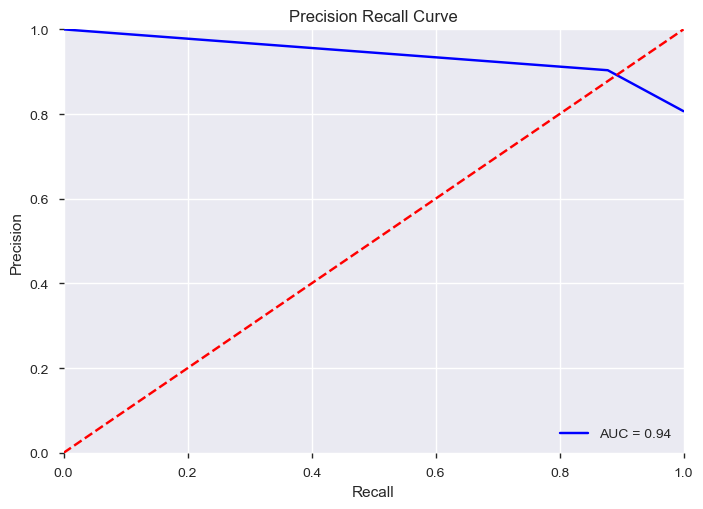

In [886]:
#from ggplot import *
#df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
#ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

# Roc Plot
import matplotlib.pyplot as plt
plt.title('Precision Recall Curve')
plt.plot(r, p, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'best')
plt.plot([0, 1], [0, 1],'r--')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

 [Table of contents](#toc)

## <<`Random Forest`>><a class="anchor" id="rfb"></a>

In [887]:
np.random.seed(1234)

In [888]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
clf_randf = RandomForestClassifier(bootstrap=True, class_weight={1:0.22,0:0.78}, criterion='gini',max_depth=7, max_features=28,
                                   n_estimators=60, n_jobs=-1,random_state=132456, 
                                   max_leaf_nodes=12,min_samples_leaf=18, min_samples_split=20,min_weight_fraction_leaf=0.115)


# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf_randf.fit(X_train, y_target)

RandomForestClassifier(bootstrap=True, class_weight={1: 0.2, 0: 0.8},
            criterion='gini', max_depth=8, max_features=28,
            max_leaf_nodes=12, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=18,
            min_samples_split=20, min_weight_fraction_leaf=0.115,
            n_estimators=60, n_jobs=-1, oob_score=False,
            random_state=132456, verbose=0, warm_start=False)

In [889]:
predicted_rf = clf_randf.predict(X_train)
preds1_rf=clf_randf.predict(X_val)
print ('Train F1 Score:', f1_score(y_target, predicted_rf, pos_label=0))
print ('Val F1 Score:', f1_score(y_val_target, preds1_rf,  pos_label=0))
print ('Train Accuracy:', accuracy_score(y_target, predicted_rf))
print ('Val Accuracy:', accuracy_score(y_val_target, preds1_rf))
print ('Train classification Report:\n', classification_report(y_target, predicted_rf))
print ('Val classification Report:\n:', classification_report(y_val_target, preds1_rf))
print ('Train Kappa Metric:', cohen_kappa_score(y_target, predicted_rf))
print ('Val Kappa Kappa Metric:', cohen_kappa_score(y_val_target, preds1_rf))


Train F1 Score: 0.4978301301921884
Val F1 Score: 0.4747663551401869
Train Accuracy: 0.7251908396946565
Val Accuracy: 0.7141403865717192
Train classification Report:
              precision    recall  f1-score   support

          0       0.38      0.71      0.50      1139
          1       0.91      0.73      0.81      4756

avg / total       0.81      0.73      0.75      5895

Val classification Report:
:              precision    recall  f1-score   support

          0       0.37      0.67      0.47       380
          1       0.90      0.73      0.80      1586

avg / total       0.80      0.71      0.74      1966

Train Kappa Metric: 0.3304463466666816
Val Kappa Kappa Metric: 0.3003558718861209


In [890]:
predicted_test_rf=clf_randf.predict(flighttrip_test)

In [891]:
#Writing to csv

submission_df_rf= pd.DataFrame()

submission_df_rf["FlightNumber"]=test_ID
submission_df_rf["FlightDelayStatus"]= predicted_test_rf

submission_df_rf["FlightDelayStatus"] =submission_df_rf["FlightDelayStatus"].map({0:1,1:2})

submission_df_rf["FlightDelayStatus"] = submission_df_rf["FlightDelayStatus"].astype('category')

#submission_df["FlightDelayStatus"].dtypes

submission_df_rf.to_csv('D:/PHD-ML/submission_rf.csv',sep=',',index=False)

 [Table of contents](#toc)

### `Random Forest model P/R Curve Validation`<a class="anchor" id="rfbprc"></a>

In [892]:
#auc on train data
p, r, threshold = precision_recall_curve(y_target, predicted_rf)
roc_auc = auc(r, p)
print(roc_auc)

#auc on val data
p_val, r_val, threshold = precision_recall_curve(y_val_target, preds1_rf)
roc_auc_val = auc(r_val, p_val)
print(roc_auc_val)



0.929800821001877
0.9240592938026758


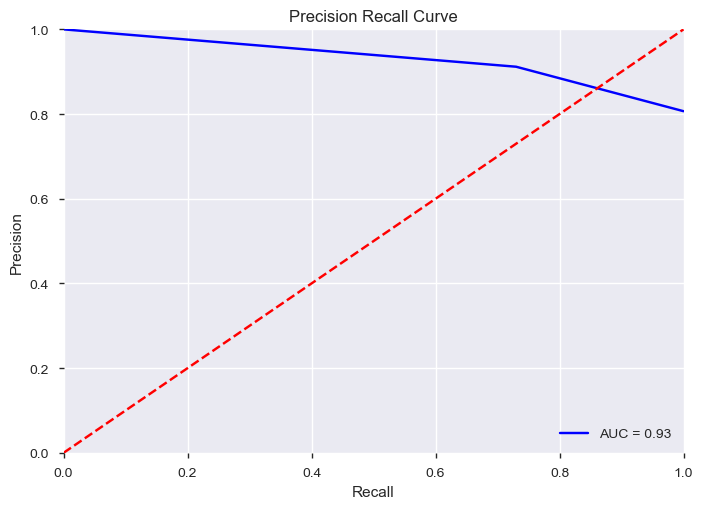

In [893]:
#from ggplot import *
#df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
#ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

# Roc Plot
import matplotlib.pyplot as plt
plt.title('Precision Recall Curve')
plt.plot(r, p, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'best')
plt.plot([0, 1], [0, 1],'r--')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

 [Table of contents](#toc)

### `Extract Random Forest important features and Building model`<a class="anchor" id="rfbimp"></a>

In [894]:
names= X_train.columns
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), clf_randf.feature_importances_), names), 
             reverse=True))

Features sorted by their score:
[(0.5517, 'dest_Visibility'), (0.3273, 'dest_RelativeHumidityPercent'), (0.0428, 'Visibility'), (0.0249, 'RelativeHumidityPercent'), (0.014, 'Origin'), (0.0086, 'Longitude'), (0.0068, 'Destination'), (0.0055, 'StationPressure'), (0.0054, 'WindSpeed'), (0.0027, 'ScheduledTravelTime'), (0.0025, 'Destination_TimeZone'), (0.0018, 'Latitude'), (0.0014, 'dest_WindSpeed'), (0.0012, 'dest_SkyConditions'), (0.0009, 'SkyConditions'), (0.0006, 'StationHeight'), (0.0004, 'dest_StationPressure'), (0.0004, 'dest_DewPointTemp'), (0.0004, 'Distance'), (0.0003, 'DewPointTemp'), (0.0002, 'dest_DBT'), (0.0002, 'GroundHeight'), (0.0, 'dest_WindGustValue'), (0.0, 'dest_WindDirection'), (0.0, 'dest_HourlyPrecip'), (0.0, 'WindGustValue'), (0.0, 'WindDirection'), (0.0, 'Origin_TimeZone'), (0.0, 'HourlyPrecip'), (0.0, 'Diff_TimeZone'), (0.0, 'DBT'), (0.0, 'BarometerHeight')]


In [895]:
impf=sorted(zip(map(lambda x: round(x, 4), clf_randf.feature_importances_), names), 
             reverse=True)
impf = pd.DataFrame(impf, index=None)
impf

,0,1
0,0.5517,dest_Visibility
1,0.3273,dest_RelativeHumidityPercent
2,0.0428,Visibility
3,0.0249,RelativeHumidityPercent
4,0.0140,Origin
5,0.0086,Longitude
6,0.0068,Destination
7,0.0055,StationPressure
8,0.0054,WindSpeed
9,0.0027,ScheduledTravelTime


### `Building RandomForest on important features`

In [896]:
impf1 = impf[1]
impf1=impf1[0:28]

In [897]:
np.random.seed(13245)

In [898]:
clf_randf1 = RandomForestClassifier(bootstrap=True, class_weight={1:0.3,0:0.7}, criterion='gini',max_depth=8, max_features=18,
                                   n_estimators=80, n_jobs=100,random_state=132456, 
                                   max_leaf_nodes=18,min_samples_leaf=18, min_samples_split=18,min_weight_fraction_leaf=0.0005)
clf_randf1.fit(X_train[impf1], y_target)

RandomForestClassifier(bootstrap=True, class_weight={1: 0.3, 0: 0.7},
            criterion='gini', max_depth=8, max_features=18,
            max_leaf_nodes=18, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=18,
            min_samples_split=18, min_weight_fraction_leaf=0.0005,
            n_estimators=80, n_jobs=100, oob_score=False,
            random_state=132456, verbose=0, warm_start=False)

In [899]:
predicted_rf1_train = clf_randf1.predict(X_train[impf1])
predicted_rf1_val=clf_randf1.predict(X_val[impf1])
print ('Train F1 Score:', f1_score(y_target, predicted_rf1_train, pos_label=0))
print ('Val F1 Score:', f1_score(y_val_target, predicted_rf1_val, pos_label=0))
print ('Train Accuracy:', accuracy_score(y_target, predicted_rf1_train))
print ('Val Accuracy:', accuracy_score(y_val_target, predicted_rf1_val))
print ('Train Classification Report:\n',  classification_report(y_target, predicted_rf1_train))
print ('Validation Classification Report:\n',  classification_report(y_val_target, predicted_rf1_val))
print ('Train Kappa score:',  cohen_kappa_score(y_target, predicted_rf1_train))
print ('Validation Kappa score:',  cohen_kappa_score(y_val_target, predicted_rf1_val))

Train F1 Score: 0.5645933014354066
Val F1 Score: 0.5200945626477542
Train Accuracy: 0.8147582697201018
Val Accuracy: 0.7934893184130214
Train Classification Report:
              precision    recall  f1-score   support

          0       0.52      0.62      0.56      1139
          1       0.90      0.86      0.88      4756

avg / total       0.83      0.81      0.82      5895

Validation Classification Report:
              precision    recall  f1-score   support

          0       0.47      0.58      0.52       380
          1       0.89      0.84      0.87      1586

avg / total       0.81      0.79      0.80      1966

Train Kappa score: 0.4482001577565313
Validation Kappa score: 0.3902600001833354


In [900]:
preds_test_rf1=clf_randf1.predict(flighttrip_test[impf1])

In [901]:
#Writing to csv

submission_df_rf_fi= pd.DataFrame()

submission_df_rf_fi["FlightNumber"]=test_ID
submission_df_rf_fi["FlightDelayStatus"]= preds_test_rf1

submission_df_rf_fi["FlightDelayStatus"] =submission_df_rf_fi["FlightDelayStatus"].map({0:1,1:2})

submission_df_rf_fi["FlightDelayStatus"] = submission_df_rf_fi["FlightDelayStatus"].astype('category')

#submission_df["FlightDelayStatus"].dtypes

submission_df_rf_fi.to_csv('D:/PHD-ML/submission_rf_fi.csv',sep=',',index=False)

 [Table of contents](#toc)

## <<`Grid Search on Random Forest`>><a class="anchor" id="rfgs"></a>

In [1004]:
from datetime import datetime
startTimeGS = datetime.now()
from sklearn.grid_search import GridSearchCV
rf = RandomForestClassifier()
param_grid = {
                 'n_estimators': [10, 25],
                 'n_jobs':[10, 20, 30],
                 'max_depth':[5, 6, 7, 8],
                 'min_samples_split': [2, 4],
                 'min_samples_leaf': [2, 4],
                 'max_features': ['sqrt', 'log2'],
                 "criterion" : ["gini", "entropy"]
             }
grid_rf = GridSearchCV(rf, param_grid, cv=10)
grid_rf.fit(X_train, y_target)
bestModel = grid_rf.best_estimator_
bestParameters = grid_rf.best_params_
gridScores = grid_rf.grid_scores_
print('Random forest Grid Search with dimension reduced data took [', datetime.now() - startTimeGS, '] seconds.')

MemoryError: 

In [ ]:
print(bestModel)
print(bestParameters)
gridScores

**`Model selection`**
- Best model and parameters from above are used to train the final model on entire training set

In [ ]:
from sklearn import cross_validation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
startTimeRF = datetime.now()
rf = RandomForestClassifier(n_estimators = bestParameters.get('n_estimators'),
                            criterion = bestParameters.get('criterion'),
                            max_features = bestParameters.get('max_features'), max_depth=7, n_jobs=10)

rf.fit(X_train, y_target)
print('Random forest training and testing with PCs took [', datetime.now() - startTimeRF, '] seconds.')

In [ ]:
predicted_rf1_train1 = rf.predict(X_train)
predicted_rf1_val1=rf.predict(X_val)
print ('Train F1 Score:', f1_score(y_target, predicted_rf1_train1, pos_label=0))
print ('Val F1 Score:', f1_score(y_val_target, predicted_rf1_val1, pos_label=0))
print ('Train Accuracy:', accuracy_score(y_target, predicted_rf1_train1))
print ('Val Accuracy:', accuracy_score(y_val_target, predicted_rf1_val1))
print ('Train Classification Report:\n',  classification_report(y_target, predicted_rf1_train1))
print ('Validation Classification Report:\n',  classification_report(y_val_target, predicted_rf1_val1))
print ('Train Kappa score:',  cohen_kappa_score(y_target, predicted_rf1_train1))
print ('Validation Kappa score:',  cohen_kappa_score(y_val_target, predicted_rf1_val1))

 [Table of contents](#toc)

### `Random Forest feature importance model P/R Curve Validation`

In [902]:
#auc on train data
p, r, threshold = precision_recall_curve(y_target, predicted_rf1_train)
roc_auc = auc(r, p)
print(roc_auc)

#auc on val data
p_val, r_val, threshold = precision_recall_curve(y_val_target, predicted_rf1_val)
roc_auc_val = auc(r_val, p_val)
print(roc_auc_val)



0.9389595053499554
0.9316766535945029


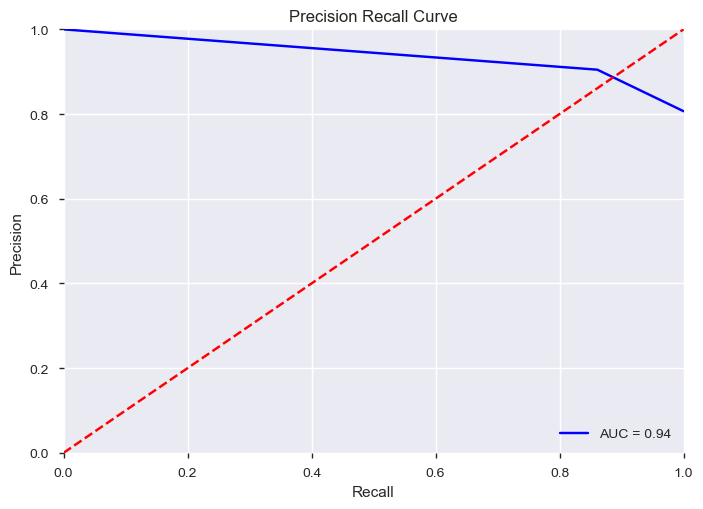

In [903]:
#from ggplot import *
#df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
#ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

# Roc Plot
import matplotlib.pyplot as plt
plt.title('Precision Recall Curve')
plt.plot(r, p, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'best')
plt.plot([0, 1], [0, 1],'r--')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

 [Table of contents](#toc)

## <<`SVM`>><a class="anchor" id="svm"></a>

In [904]:
'''from sklearn.svm import SVC # "Support Vector Classifier" 
clf_svm = SVC(kernel='rbf', gamma=6, degree=50 , random_state=127654, C=0.8) 
  
# fitting x samples and y classes 
clf_svm.fit(X_train, y_target)
predicted_svm = clf_svm.predict(X_train)
preds_val_svm=clf_svm.predict(X_val)
print ('Train F1 score:', f1_score(y_target, predicted_svm))
print ('val F1 score:', f1_score(y_val_target, preds_val_svm))
print ('Train Classification Report:\n', classification_report(y_target, predicted_svm))
print ('val Classification Report:\n', classification_report(y_val_target, preds_val_svm))
'''

'from sklearn.svm import SVC # "Support Vector Classifier" \nclf_svm = SVC(kernel=\'rbf\', gamma=6, degree=50 , random_state=127654, C=0.8) \n  \n# fitting x samples and y classes \nclf_svm.fit(X_train, y_target)\npredicted_svm = clf_svm.predict(X_train)\npreds_val_svm=clf_svm.predict(X_val)\nprint (\'Train F1 score:\', f1_score(y_target, predicted_svm))\nprint (\'val F1 score:\', f1_score(y_val_target, preds_val_svm))\nprint (\'Train Classification Report:\n\', classification_report(y_target, predicted_svm))\nprint (\'val Classification Report:\n\', classification_report(y_val_target, preds_val_svm))\n'

 [Table of contents](#toc)

## <<`Deep Learning Neural Network`>> <a class="anchor" id="dlnn"></a>

In [905]:
#using AI perceptron# Building a perceptron model
model = Sequential()
# here 1 indicates number of neurons and 2 indicates number of classes(dimensions) in the classification problem
model.add(Dense(8, input_dim=len(X_train.columns), activation='relu'))
model.add(Dense(8, input_dim=len(X_train.columns), activation='relu'))
model.add(Dense(8, input_dim=len(X_train.columns), activation='relu'))
model.add(Dense(1, input_shape=(2,), activation='sigmoid', use_bias=True, bias_initializer='zero'))
#optimizer = trainer
# if optimizer is sgd then default batch size is 32  
model.compile(optimizer='Adam',
      loss='binary_crossentropy',
      metrics=['accuracy'])

In [906]:
#from keras.utils import to_categorical
#y_binary = to_categorical(tar)

history=model.fit(X_train, y_target, epochs=100, class_weight={0:0.2,1:0.8}, batch_size=128)

Epoch 1/100
5895/5895 [==============================] - 1s 195us/step - loss: 6.9231 - acc: 0.3645
Epoch 2/100
5895/5895 [==============================] - 0s 28us/step - loss: 0.5972 - acc: 0.8031
Epoch 3/100
5895/5895 [==============================] - 0s 22us/step - loss: 0.5424 - acc: 0.8061
Epoch 4/100
5895/5895 [==============================] - 0s 16us/step - loss: 0.5262 - acc: 0.8064
Epoch 5/100
5895/5895 [==============================] - 0s 16us/step - loss: 0.4528 - acc: 0.8049
Epoch 6/100
5895/5895 [==============================] - 0s 17us/step - loss: 0.2113 - acc: 0.8066
Epoch 7/100
5895/5895 [==============================] - 0s 17us/step - loss: 0.1989 - acc: 0.8112
Epoch 8/100
5895/5895 [==============================] - 0s 18us/step - loss: 0.1856 - acc: 0.8117
Epoch 9/100
5895/5895 [==============================] - 0s 17us/step - loss: 0.1838 - acc: 0.8144
Epoch 10/100
5895/5895 [==============================] - 0s 18us/step - loss: 0.1813 - acc: 0.8146
Epoch 11

In [907]:
history_val=model.fit(X_val, y_val_target, epochs=100, class_weight={0:0.2,1:0.8})

Epoch 1/100
1966/1966 [==============================] - 0s 73us/step - loss: 0.1974 - acc: 0.8062
Epoch 2/100
1966/1966 [==============================] - 0s 70us/step - loss: 0.1385 - acc: 0.8118
Epoch 3/100
1966/1966 [==============================] - 0s 69us/step - loss: 0.1324 - acc: 0.8164
Epoch 4/100
1966/1966 [==============================] - 0s 59us/step - loss: 0.1432 - acc: 0.8184
Epoch 5/100
1966/1966 [==============================] - 0s 61us/step - loss: 0.1346 - acc: 0.8128
Epoch 6/100
1966/1966 [==============================] - 0s 63us/step - loss: 0.1314 - acc: 0.8118
Epoch 7/100
1966/1966 [==============================] - 0s 62us/step - loss: 0.1305 - acc: 0.8149
Epoch 8/100
1966/1966 [==============================] - 0s 63us/step - loss: 0.1337 - acc: 0.8154
Epoch 9/100
1966/1966 [==============================] - 0s 72us/step - loss: 0.1415 - acc: 0.8189
Epoch 10/100
1966/1966 [==============================] - 0s 76us/step - loss: 0.1609 - acc: 0.8154
Epoch 11/

1966/1966 [==============================] - 0s 66us/step - loss: 0.1265 - acc: 0.8230
Epoch 84/100
1966/1966 [==============================] - 0s 61us/step - loss: 0.1288 - acc: 0.8220
Epoch 85/100
1966/1966 [==============================] - 0s 63us/step - loss: 0.1294 - acc: 0.8230
Epoch 86/100
1966/1966 [==============================] - 0s 63us/step - loss: 0.1285 - acc: 0.8250
Epoch 87/100
1966/1966 [==============================] - 0s 63us/step - loss: 0.1258 - acc: 0.8260
Epoch 88/100
1966/1966 [==============================] - 0s 64us/step - loss: 0.1251 - acc: 0.8266
Epoch 89/100
1966/1966 [==============================] - 0s 66us/step - loss: 0.1312 - acc: 0.8235
Epoch 90/100
1966/1966 [==============================] - 0s 75us/step - loss: 0.1345 - acc: 0.8255
Epoch 91/100
1966/1966 [==============================] - 0s 69us/step - loss: 0.1275 - acc: 0.8255
Epoch 92/100
1966/1966 [==============================] - 0s 61us/step - loss: 0.1238 - acc: 0.8225
Epoch 93/100


In [908]:
predicted = model.predict(X_train)
#predicted = np.argmax(predicted, axis=1)
predicted = np.where(predicted > 0.8, 1, 0)
f1_score(y_target, predicted, pos_label=0)


0.34771732332707944

In [909]:
predicted1 = model.predict(X_val)
predicted1 = np.where(predicted1 > 0.8, 1, 0)
f1_score(y_val_target, predicted1, pos_label=0)

0.4464609800362977

 [Table of contents](#toc)

## <<`Summary & Conclusion`>><a class="anchor" id="summary"></a>

### `Summary` 

In this project I have used Machine Learning Algorithms like Logistic regression, Ensemble boosting techniques to predict the flight delay status from a particular origin. Moreover, I have used a new ensemble classification techniques called Catboost to increase the score and avoid over-fitting to enhance my prediction power based on available additional information and I found that this technique works the best.


**`--Learnings & Takeaways--`**
- Some Intersting things that I learnt during this project are:
- Using the Catboost package to predict the data, and explored its permutation techniques to get the scores.
- Sensitivity of the class imbalance and how to avoid over-fitting by incorporating class weights in the algorithms.
- Pandas Profiling to get the detailed report of the entire data and its correlation values.
- Dealing with the large data and filtering and making it Algorithm useful to get the insights.

### `Conclusion`

> `On studying the Flight trip data using multiple techniques, I concluded that the following features play a major role in the delay of flights`
- dest_RelativeHumidityPercent
- dest_SkyConditions
- Longitude
- Destination
- SkyConditions
- ScheduledTravelTime
- Origin
- dest_DBT
- RelativeHumidityPercent
- WindSpeed
- Latitude
- Distance
- dest_WindDirection
- dest_Visibility
- StationPressure
- DBT
- WindDirection
- DewPointTemp
- Destination_TimeZone
- dest_StationPressure
- dest_DewPointTemp
- Visibility
- dest_WindSpeed

With the above columns we can infer that weather is having very drastic influence on flight delayes based on the data provided.

**Model Performance:**
- Xgboost and Catboost models gave best performance when used with derived importance variables from model data of weather, all stations and flight trip details. F1 score for the positive label which is 'delayed' (0) is 
    - For catboost 0.55 and 0.57 for train and validation.
    - For Xgboost 0.569 and 0.53 for train and Validation

**Improvement:**
- Based on the current insights there is further scope for imroving the by:
- Data Augmentation technique like Smotting.
- Stacking to predict delayes.
- Understanding the domain and using it for feature engineering.

 [Table of contents](#toc)

## <<`Business Recommendations`>><a class="anchor" id="bussrecom"></a>

Flight delay plays a vast role in impacting the revenue and reputation of all stakeholders and this loss may influence the economy. 
- With our solution of predicting the delay will be useful for various multiple stakeholders like in the for a 
    - `customer appropriately managing the time` and 
    - for `carrier gaining the customer faith` and 
    - for `Airports` will be extra capable of `managing the traffic and increase the number of arriving flights` by its appropriate schedule adjustments.